Implement a KNN model to classify the animals into categories.

Dataset used: Zoo.csv

In [ ]:
# KNN Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Load the data
zoo=pd.read_csv('/content/Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
zoo.shape

(101, 18)

In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
zoo.duplicated().sum()

0

There are no null items and no duplicated records in our dataset

In [ ]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

41 animals belong to majority Type 1 category, followed by type 2 and type 4. Animals belonging to Type 5 are very few (4).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


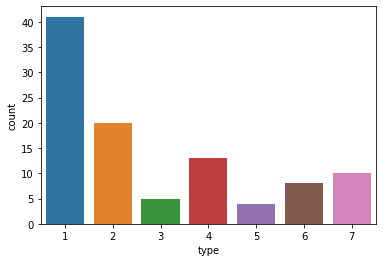

In [ ]:
sns.countplot(zoo.type)

We can see that our data is imbalanced. 

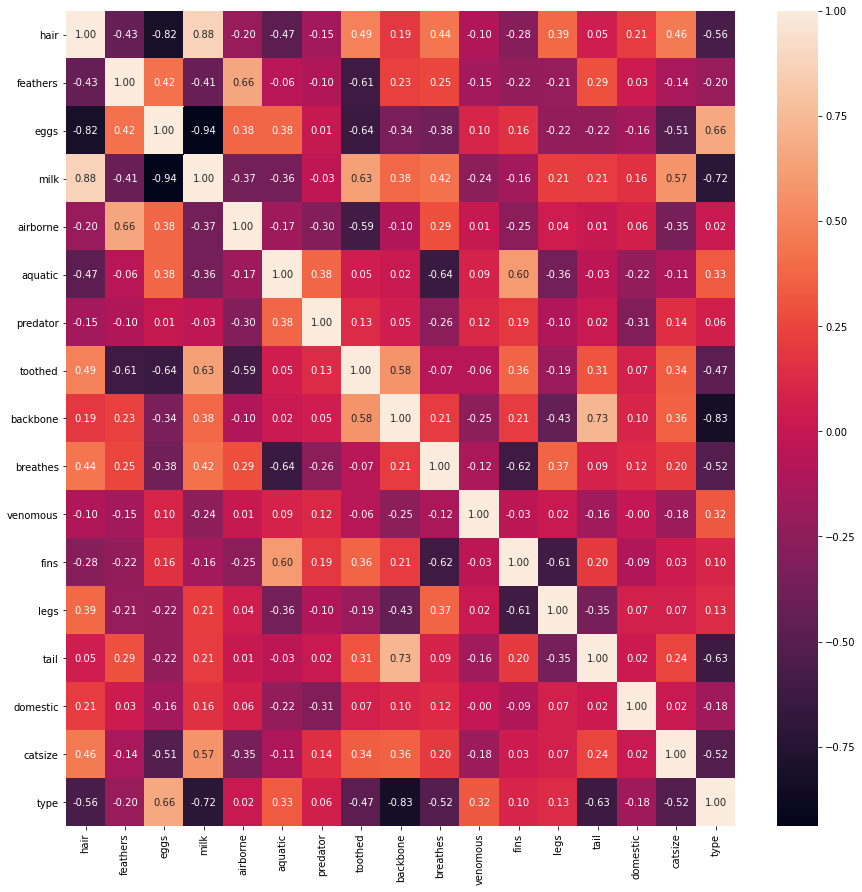

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(zoo.corr(), annot=True,fmt='.2f')
plt.show()

In [ ]:
#Extract the dependent and Independent features
X=zoo.iloc[:,1:-1].values
y=zoo.iloc[:,-1].values
print(X.shape,y.shape)

(101, 16) (101,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(80, 16) (21, 16) (80,) (21,)


In [ ]:
y_test

array([1, 2, 1, 4, 1, 6, 2, 7, 1, 4, 2, 3, 6, 1, 4, 2, 1, 5, 1, 1, 7])

##Grid Search Algorithm tuning

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'n_neighbors': 1}


##Visualising the CV results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

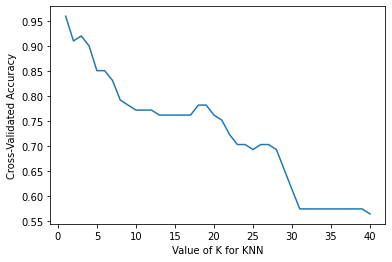

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Choose 2 as optimum number of neighbors to avoid overfitting of the model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
knn = KNeighborsClassifier(n_neighbors =2)
model=knn.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9523809523809523


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
train_pred=model.predict(X_train)
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
train_acc=round(accuracy_score(y_train, train_pred)*100.0,3)
print('Accuracy of train dataset:{}%'.format(train_acc))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
test_acc=round(accuracy_score(y_test, y_pred)*100.0,3)
print('Accuracy of test dataset:{}%'.format(test_acc))

[[33  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  1  0  2  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  1  1  6]]
Accuracy of train dataset:96.25%
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 1]]
Accuracy of test dataset:95.238%


In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [1 1]
 [4 4]
 [1 1]
 [6 6]
 [2 2]
 [6 7]
 [1 1]
 [4 4]
 [2 2]
 [3 3]
 [6 6]
 [1 1]
 [4 4]
 [2 2]
 [1 1]
 [5 5]
 [1 1]
 [1 1]
 [7 7]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.95      0.93      0.92        21
weighted avg       0.97      0.95      0.95        21

